In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import lightgbm as lgb
import random

In [2]:
df = pd.read_csv('train.csv')

In [4]:
X_code = df.drop(['target'], axis=1).values
y = df['target'].values
# X_code_train, X_code_val, y_train, y_val = train_test_split(X_code, y, test_size= 0.2, random_state=0, stratify=y)

X_code_train = X_code
y_train = y


# X_train = X_code_train[:,1:].astype(np.float)
# code_train = X_code_train[:,0]
# X_val = X_code_val[:,1:].astype(np.float)
# code_val = X_code_val[:,0]

NameError: name 'X_code_val' is not defined

In [4]:
gbms = []
num_gbm  = 20

for i in range(num_gbm):
    print(i)
    X_cv_train, X_cv_val, y_cv_train, y_cv_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=i, stratify=y_train)

    lgb_cv_train = lgb.Dataset(X_cv_train, y_cv_train)
    lgb_cv_val = lgb.Dataset(X_cv_val, y_cv_val, reference=lgb_cv_train)

    params = {
        'objective': 'binary',
        'boost_from_average':False,
        'metric': 'auc',
        'boosting_type': 'gbdt', 
    'feature_fraction': 0.9077963052915876, 'learning_rate': 0.011358781846579069, 'subsample': 0.8453858498917617, 'min_data_in_leaf': 87, 'min_sum_hessian_in_leaf': 0.0021980270412619816, 'bagging_fraction': 0.8726993481456968, 'bagging_freq': 10, 'min_gain_to_split': 0.8438313225454216, 'lambda_l1': 0.4047026283855469, 'lambda_l2': 0.08369497932482868, 'num_leaves': 18, 'max_bin': 164
    }

#     gbm = lgb.train(params,
#                     lgb_cv_train,
#                     valid_sets=lgb_cv_val,
#                     num_boost_round=10000,
#                     early_stopping_rounds=100,
#                     verbose_eval = 0)
    gbm = lgb.train(params,
                lgb_cv_train,
                num_boost_round=10000,
                verbose_eval = 0)
    gbms.append(gbm)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


0.8969811064497166


<function matplotlib.pyplot.show(*args, **kw)>

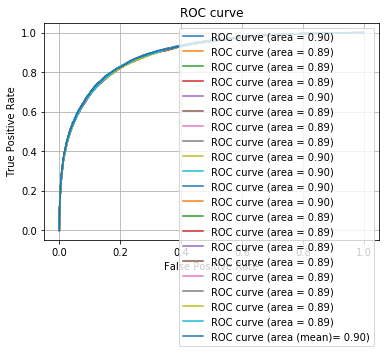

In [5]:
y_pred_list_gbm = []
for gbm in gbms:

    y_val_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
    y_pred_list_gbm.append(y_val_pred)

    fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
    auc_val = metrics.auc(fpr_val, tpr_val)

    plt.plot(fpr_val, tpr_val, label='ROC curve (area = %.2f)'%auc_val)

y_pred_mean_gbm = np.array(y_pred_list_gbm).mean(axis=0)
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_pred_mean_gbm)
auc_val = metrics.auc(fpr_val, tpr_val)
# print('------------------')
# print(auc_train)
print(auc_val)

# plt.plot(fpr_train, tpr_train, label='ROC curve (area = %.2f)'%auc_train)
plt.plot(fpr_val, tpr_val, label='ROC curve (area (mean)= %.2f)'%auc_val)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show

0.8969812047784056


<function matplotlib.pyplot.show(*args, **kw)>

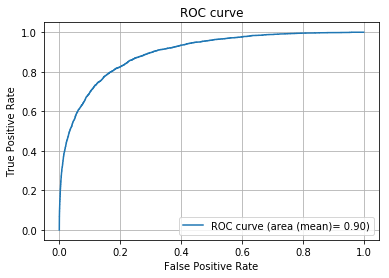

In [6]:
y_pred_mean_gbm = np.array(y_pred_list_gbm).prod(axis=0)**(1/num_gbm)

fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_pred_mean_gbm)
auc_val = metrics.auc(fpr_val, tpr_val)
print(auc_val)
plt.plot(fpr_val, tpr_val, label='ROC curve (area (mean)= %.2f)'%auc_val)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show

In [7]:
gnbs = []
num_gnb = 400

for i in range(num_gnb):
    X_cv_train, X_cv_val, y_cv_train, y_cv_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=i, stratify=y_train)
    gnb = GaussianNB()
    gnb.fit(X_cv_train, y_cv_train)
    gnbs.append(gnb)
    
y_pred_list_gnb = []
auc_list = []
gnbs_rev = []
for gnb in gnbs:
    y_val_pred_gnb = gnb.predict_proba(X_val)[:,1]
    fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred_gnb)
    auc_val = metrics.auc(fpr_val, tpr_val)
    if auc_val > 0.87:
        y_pred_list_gnb.append(y_val_pred)
        gnbs_rev.append(gnb)

0.8943742408333847


<function matplotlib.pyplot.show(*args, **kw)>

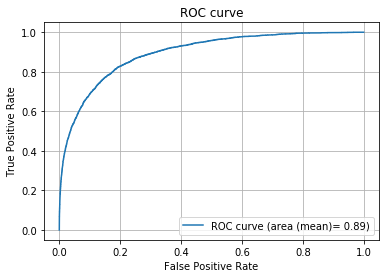

In [8]:
# y_pred_mean_gnb = np.array(y_pred_list).prod(axis=0)**(1/num_gnb)
y_pred_mean_gnb = np.array(y_pred_list_gnb).mean(axis=0)
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_pred_mean_gnb)
auc_val = metrics.auc(fpr_val, tpr_val)
print(auc_val)
plt.plot(fpr_val, tpr_val, label='ROC curve (area (mean)= %.2f)'%auc_val)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show

In [9]:
df_test = pd.read_csv('test.csv')
X_test = df_test.drop('ID_code', axis=1).values

In [10]:
y_test_pred_gnb = []
for gnb in gnbs_rev:
    y_test_pred_gnb.append(gnb.predict_proba(X_test)[:,1])
y_test_pred_gnb = np.array(y_test_pred_gnb)
y_test_pred_gnb_mean = np.array(y_test_pred_gnb).mean(axis=0)

In [13]:
y_test_pred_gbm = []
for gbm in gbms:
    y_test_pred_gbm.append(gbm.predict(X_test, num_iteration=gbm.best_iteration))
y_test_pred_gbm = np.array(y_test_pred_gbm)
y_test_pred_gmb_mean = np.array(y_test_pred_gbm).mean(axis=0)

In [14]:
y_test_pred = (y_test_pred_gnb_mean * y_test_pred_gmb_mean) ** 0.5

In [16]:
se_y_test_pred = pd.Series(y_test_pred, name='target')
df_sub = pd.concat([df_test['ID_code'], se_y_test_pred], axis=1)

In [17]:
df_sub.head()

,ID_code,target
0,test_0,0.096804
1,test_1,0.212253
2,test_2,0.227332
3,test_3,0.129955
4,test_4,0.036490


In [18]:
df_sub.to_csv('submission.csv', index=False)

In [204]:
import optuna
def objective(trial):
    """最小化する目的関数"""
    # LightGBM parameters
    params = {
        'objective': 'binary',
        'boost_from_average':False,
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.8, 1.0), # 1.0 use
        'learning_rate': trial.suggest_uniform('learning_rate', 0.001, 1.0), # small for acc
        'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100), # 20 use
        'min_sum_hessian_in_leaf' : trial.suggest_uniform('min_sum_hessian_in_leaf', 1e-4, 1e-2) ,#1e-3 use
        'bagging_fraction' : trial.suggest_uniform('bagging_fraction', 0.8, 1.0) ,# 1.0 use
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 10) ,# 0 use
        'min_gain_to_split': trial.suggest_uniform('min_gain_to_split', 0.8, 1.0),# 0.0 use
        'lambda_l1': trial.suggest_uniform('lambda_l1', 0.0, 0.5),
        'lambda_l2': trial.suggest_uniform('lambda_l2', 0.0, 0.5),
        'num_leaves'   : trial.suggest_int('num_leaves', 16, 31), # 31, small for overfit, large for acc
        'max_bin': trial.suggest_int('max_bin', 128, 255), # 255, small for overfit, large for acc, 
    }
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    valid_sets=lgb_val,
                    num_boost_round=10000,
                    early_stopping_rounds=100,
                    verbose_eval = 200)    
    
    y_train_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)
    fpr_train, tpr_train, thresholds_train= metrics.roc_curve(y_train, y_train_pred)
    auc_train = metrics.auc(fpr_train, tpr_train)
    
    y_val_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
    fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
    auc_val = metrics.auc(fpr_val, tpr_val)
    return   - auc_val

In [212]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[79]	valid_0's auc: 0.855122


[I 2019-04-08 15:57:13,320] Finished trial#0 resulted in value: 0.096823054944845. Current best value is 0.096823054944845 with parameters: {'feature_fraction': 0.9177732970678891, 'learning_rate': 0.6211431637986587, 'subsample': 0.8471298484270727, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 0.00034828107633282123, 'bagging_fraction': 0.9253806573219294, 'bagging_freq': 3, 'min_gain_to_split': 0.8070815881948621, 'lambda_l1': 0.15098067725853115, 'lambda_l2': 0.26170008742191425, 'num_leaves': 26, 'max_bin': 181}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[60]	valid_0's auc: 0.84209


[I 2019-04-08 15:57:23,758] Finished trial#1 resulted in value: 0.0811730399794125. Current best value is 0.0811730399794125 with parameters: {'feature_fraction': 0.9894069902088283, 'learning_rate': 0.9414318518072982, 'subsample': 0.8345173148931875, 'min_data_in_leaf': 29, 'min_sum_hessian_in_leaf': 0.0022264135388895168, 'bagging_fraction': 0.9010335082217246, 'bagging_freq': 7, 'min_gain_to_split': 0.9902582268191528, 'lambda_l1': 0.10522995437676913, 'lambda_l2': 0.08076947271299684, 'num_leaves': 19, 'max_bin': 241}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.882304
[400]	valid_0's auc: 0.886353
Early stopping, best iteration is:
[317]	valid_0's auc: 0.88699


[I 2019-04-08 15:58:01,558] Finished trial#2 resulted in value: 0.09070643227640818. Current best value is 0.0811730399794125 with parameters: {'feature_fraction': 0.9894069902088283, 'learning_rate': 0.9414318518072982, 'subsample': 0.8345173148931875, 'min_data_in_leaf': 29, 'min_sum_hessian_in_leaf': 0.0022264135388895168, 'bagging_fraction': 0.9010335082217246, 'bagging_freq': 7, 'min_gain_to_split': 0.9902582268191528, 'lambda_l1': 0.10522995437676913, 'lambda_l2': 0.08076947271299684, 'num_leaves': 19, 'max_bin': 241}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[75]	valid_0's auc: 0.860319


[I 2019-04-08 15:58:15,919] Finished trial#3 resulted in value: 0.0977579739759682. Current best value is 0.0811730399794125 with parameters: {'feature_fraction': 0.9894069902088283, 'learning_rate': 0.9414318518072982, 'subsample': 0.8345173148931875, 'min_data_in_leaf': 29, 'min_sum_hessian_in_leaf': 0.0022264135388895168, 'bagging_fraction': 0.9010335082217246, 'bagging_freq': 7, 'min_gain_to_split': 0.9902582268191528, 'lambda_l1': 0.10522995437676913, 'lambda_l2': 0.08076947271299684, 'num_leaves': 19, 'max_bin': 241}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.880905
[400]	valid_0's auc: 0.889248
Early stopping, best iteration is:
[414]	valid_0's auc: 0.889413


[I 2019-04-08 15:58:48,508] Finished trial#4 resulted in value: 0.06807740456170452. Current best value is 0.06807740456170452 with parameters: {'feature_fraction': 0.9279118331863507, 'learning_rate': 0.12647578065859258, 'subsample': 0.9294486511045343, 'min_data_in_leaf': 66, 'min_sum_hessian_in_leaf': 0.003802978600610406, 'bagging_fraction': 0.8204642420031931, 'bagging_freq': 6, 'min_gain_to_split': 0.9244983702100097, 'lambda_l1': 0.02749060824168087, 'lambda_l2': 0.39696987110890525, 'num_leaves': 17, 'max_bin': 157}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[53]	valid_0's auc: 0.840886


[I 2019-04-08 15:58:57,538] Finished trial#5 resulted in value: 0.08425624014999611. Current best value is 0.06807740456170452 with parameters: {'feature_fraction': 0.9279118331863507, 'learning_rate': 0.12647578065859258, 'subsample': 0.9294486511045343, 'min_data_in_leaf': 66, 'min_sum_hessian_in_leaf': 0.003802978600610406, 'bagging_fraction': 0.8204642420031931, 'bagging_freq': 6, 'min_gain_to_split': 0.9244983702100097, 'lambda_l1': 0.02749060824168087, 'lambda_l2': 0.39696987110890525, 'num_leaves': 17, 'max_bin': 157}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.880363
Early stopping, best iteration is:
[199]	valid_0's auc: 0.880498


[I 2019-04-08 15:59:20,092] Finished trial#6 resulted in value: 0.0893055330067608. Current best value is 0.06807740456170452 with parameters: {'feature_fraction': 0.9279118331863507, 'learning_rate': 0.12647578065859258, 'subsample': 0.9294486511045343, 'min_data_in_leaf': 66, 'min_sum_hessian_in_leaf': 0.003802978600610406, 'bagging_fraction': 0.8204642420031931, 'bagging_freq': 6, 'min_gain_to_split': 0.9244983702100097, 'lambda_l1': 0.02749060824168087, 'lambda_l2': 0.39696987110890525, 'num_leaves': 17, 'max_bin': 157}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.870612
Early stopping, best iteration is:
[158]	valid_0's auc: 0.872914


[I 2019-04-08 15:59:36,416] Finished trial#7 resulted in value: 0.08456082044531255. Current best value is 0.06807740456170452 with parameters: {'feature_fraction': 0.9279118331863507, 'learning_rate': 0.12647578065859258, 'subsample': 0.9294486511045343, 'min_data_in_leaf': 66, 'min_sum_hessian_in_leaf': 0.003802978600610406, 'bagging_fraction': 0.8204642420031931, 'bagging_freq': 6, 'min_gain_to_split': 0.9244983702100097, 'lambda_l1': 0.02749060824168087, 'lambda_l2': 0.39696987110890525, 'num_leaves': 17, 'max_bin': 157}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.882523
Early stopping, best iteration is:
[259]	valid_0's auc: 0.882946


[I 2019-04-08 15:59:59,280] Finished trial#8 resulted in value: 0.08669971553017419. Current best value is 0.06807740456170452 with parameters: {'feature_fraction': 0.9279118331863507, 'learning_rate': 0.12647578065859258, 'subsample': 0.9294486511045343, 'min_data_in_leaf': 66, 'min_sum_hessian_in_leaf': 0.003802978600610406, 'bagging_fraction': 0.8204642420031931, 'bagging_freq': 6, 'min_gain_to_split': 0.9244983702100097, 'lambda_l1': 0.02749060824168087, 'lambda_l2': 0.39696987110890525, 'num_leaves': 17, 'max_bin': 157}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.873774
Early stopping, best iteration is:
[164]	valid_0's auc: 0.875816


[I 2019-04-08 16:00:16,430] Finished trial#9 resulted in value: 0.07881664900579877. Current best value is 0.06807740456170452 with parameters: {'feature_fraction': 0.9279118331863507, 'learning_rate': 0.12647578065859258, 'subsample': 0.9294486511045343, 'min_data_in_leaf': 66, 'min_sum_hessian_in_leaf': 0.003802978600610406, 'bagging_fraction': 0.8204642420031931, 'bagging_freq': 6, 'min_gain_to_split': 0.9244983702100097, 'lambda_l1': 0.02749060824168087, 'lambda_l2': 0.39696987110890525, 'num_leaves': 17, 'max_bin': 157}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.831043
[400]	valid_0's auc: 0.863689
[600]	valid_0's auc: 0.87674
[800]	valid_0's auc: 0.884067
[1000]	valid_0's auc: 0.888213
[1200]	valid_0's auc: 0.89076
[1400]	valid_0's auc: 0.892273
[1600]	valid_0's auc: 0.892881
[1800]	valid_0's auc: 0.893412
Early stopping, best iteration is:
[1830]	valid_0's auc: 0.893428


[I 2019-04-08 16:02:47,630] Finished trial#10 resulted in value: 0.08155735930685082. Current best value is 0.06807740456170452 with parameters: {'feature_fraction': 0.9279118331863507, 'learning_rate': 0.12647578065859258, 'subsample': 0.9294486511045343, 'min_data_in_leaf': 66, 'min_sum_hessian_in_leaf': 0.003802978600610406, 'bagging_fraction': 0.8204642420031931, 'bagging_freq': 6, 'min_gain_to_split': 0.9244983702100097, 'lambda_l1': 0.02749060824168087, 'lambda_l2': 0.39696987110890525, 'num_leaves': 17, 'max_bin': 157}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.711006
[400]	valid_0's auc: 0.724994
[600]	valid_0's auc: 0.737295
[800]	valid_0's auc: 0.752264
[1000]	valid_0's auc: 0.76486
[1200]	valid_0's auc: 0.777046
[1400]	valid_0's auc: 0.786446
[1600]	valid_0's auc: 0.795063
[1800]	valid_0's auc: 0.803453
[2000]	valid_0's auc: 0.810366
[2200]	valid_0's auc: 0.816789
[2400]	valid_0's auc: 0.822555
[2600]	valid_0's auc: 0.82769
[2800]	valid_0's auc: 0.832256
[3000]	valid_0's auc: 0.835851
[3200]	valid_0's auc: 0.839446
[3400]	valid_0's auc: 0.842624
[3600]	valid_0's auc: 0.84541
[3800]	valid_0's auc: 0.848144
[4000]	valid_0's auc: 0.850585
[4200]	valid_0's auc: 0.852721
[4400]	valid_0's auc: 0.8547
[4600]	valid_0's auc: 0.856506
[4800]	valid_0's auc: 0.858317
[5000]	valid_0's auc: 0.860082
[5200]	valid_0's auc: 0.861634
[5400]	valid_0's auc: 0.863141
[5600]	valid_0's auc: 0.864409
[5800]	valid_0's auc: 0.865783
[6000]	valid_0's auc: 0.866934
[6200]	valid_0's

[I 2019-04-08 16:14:38,574] Finished trial#11 resulted in value: 0.04562297822177308. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[72]	valid_0's auc: 0.859587


[I 2019-04-08 16:14:48,504] Finished trial#12 resulted in value: 0.0664444109466048. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.849171
[400]	valid_0's auc: 0.874512
[600]	valid_0's auc: 0.884197
[800]	valid_0's auc: 0.888766
[1000]	valid_0's auc: 0.891189
[1200]	valid_0's auc: 0.892251
Early stopping, best iteration is:
[1182]	valid_0's auc: 0.892325


[I 2019-04-08 16:17:27,294] Finished trial#13 resulted in value: 0.08060206534774039. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.877603
Early stopping, best iteration is:
[166]	valid_0's auc: 0.87806


[I 2019-04-08 16:17:51,812] Finished trial#14 resulted in value: 0.07608967724919291. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.751931
[400]	valid_0's auc: 0.782433
[600]	valid_0's auc: 0.809098
[800]	valid_0's auc: 0.828197
[1000]	valid_0's auc: 0.841002
[1200]	valid_0's auc: 0.850274
[1400]	valid_0's auc: 0.857553
[1600]	valid_0's auc: 0.862995
[1800]	valid_0's auc: 0.86733
[2000]	valid_0's auc: 0.870932
[2200]	valid_0's auc: 0.874073
[2400]	valid_0's auc: 0.876665
[2600]	valid_0's auc: 0.879063
[2800]	valid_0's auc: 0.881083
[3000]	valid_0's auc: 0.882813
[3200]	valid_0's auc: 0.884143
[3400]	valid_0's auc: 0.885417
[3600]	valid_0's auc: 0.886626
[3800]	valid_0's auc: 0.887622
[4000]	valid_0's auc: 0.888572
[4200]	valid_0's auc: 0.889368
[4400]	valid_0's auc: 0.890022
[4600]	valid_0's auc: 0.890628
[4800]	valid_0's auc: 0.891309
[5000]	valid_0's auc: 0.891844
[5200]	valid_0's auc: 0.892306
[5400]	valid_0's auc: 0.892646
[5600]	valid_0's auc: 0.892933
[5800]	valid_0's auc: 0.893235
[6000]	valid_0's auc: 0.893494
[6200]	valid

[I 2019-04-08 16:31:49,864] Finished trial#15 resulted in value: 0.08641653080708911. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[65]	valid_0's auc: 0.859368


[I 2019-04-08 16:32:01,198] Finished trial#16 resulted in value: 0.065552283169939. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[62]	valid_0's auc: 0.850575


[I 2019-04-08 16:32:13,581] Finished trial#17 resulted in value: 0.0860379340745997. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[69]	valid_0's auc: 0.853616


[I 2019-04-08 16:32:24,490] Finished trial#18 resulted in value: 0.07344741789418485. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[64]	valid_0's auc: 0.859


[I 2019-04-08 16:32:37,501] Finished trial#19 resulted in value: 0.08017651345026777. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[50]	valid_0's auc: 0.84243


[I 2019-04-08 16:32:49,428] Finished trial#20 resulted in value: 0.09217263155310285. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[79]	valid_0's auc: 0.853022


[I 2019-04-08 16:33:01,818] Finished trial#21 resulted in value: 0.08814827737220843. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.861239
Early stopping, best iteration is:
[106]	valid_0's auc: 0.866612


[I 2019-04-08 16:33:15,129] Finished trial#22 resulted in value: 0.07650917828674819. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.861965
Early stopping, best iteration is:
[108]	valid_0's auc: 0.866264


[I 2019-04-08 16:33:30,308] Finished trial#23 resulted in value: 0.08746916103411007. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[69]	valid_0's auc: 0.851912


[I 2019-04-08 16:33:41,191] Finished trial#24 resulted in value: 0.07633703248224921. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.876243
Early stopping, best iteration is:
[178]	valid_0's auc: 0.876665


[I 2019-04-08 16:34:03,632] Finished trial#25 resulted in value: 0.09243686932806983. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.872689
[400]	valid_0's auc: 0.88789
[600]	valid_0's auc: 0.891188
[800]	valid_0's auc: 0.891852
Early stopping, best iteration is:
[792]	valid_0's auc: 0.891869


[I 2019-04-08 16:35:10,220] Finished trial#26 resulted in value: 0.08423340059220497. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[76]	valid_0's auc: 0.861552


[I 2019-04-08 16:35:21,774] Finished trial#27 resulted in value: 0.07202398814190858. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[64]	valid_0's auc: 0.849781


[I 2019-04-08 16:35:34,591] Finished trial#28 resulted in value: 0.08934727158052846. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[50]	valid_0's auc: 0.83345


[I 2019-04-08 16:35:44,653] Finished trial#29 resulted in value: 0.09303158784480736. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[82]	valid_0's auc: 0.863547


[I 2019-04-08 16:35:56,465] Finished trial#30 resulted in value: 0.07223884678568082. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.881703
[400]	valid_0's auc: 0.886711
Early stopping, best iteration is:
[352]	valid_0's auc: 0.887404


[I 2019-04-08 16:36:33,954] Finished trial#31 resulted in value: 0.07596991262827202. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[94]	valid_0's auc: 0.863122


[I 2019-04-08 16:36:47,123] Finished trial#32 resulted in value: 0.07887451608612084. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.875775
Early stopping, best iteration is:
[160]	valid_0's auc: 0.875991


[I 2019-04-08 16:37:07,387] Finished trial#33 resulted in value: 0.08531719927401527. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[50]	valid_0's auc: 0.840626


[I 2019-04-08 16:37:17,249] Finished trial#34 resulted in value: 0.07547299103967353. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[46]	valid_0's auc: 0.833386


[I 2019-04-08 16:37:29,230] Finished trial#35 resulted in value: 0.0914240750229598. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.879963
[400]	valid_0's auc: 0.888193
Early stopping, best iteration is:
[468]	valid_0's auc: 0.888292


[I 2019-04-08 16:38:16,064] Finished trial#36 resulted in value: 0.08778058407036138. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[91]	valid_0's auc: 0.866346


[I 2019-04-08 16:38:29,229] Finished trial#37 resulted in value: 0.07544125017574366. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[82]	valid_0's auc: 0.854466


[I 2019-04-08 16:38:40,247] Finished trial#38 resulted in value: 0.0821781486565577. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.881803
[400]	valid_0's auc: 0.884654
Early stopping, best iteration is:
[346]	valid_0's auc: 0.884874


[I 2019-04-08 16:39:15,651] Finished trial#39 resulted in value: 0.0887244042571147. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[66]	valid_0's auc: 0.851352


[I 2019-04-08 16:39:27,147] Finished trial#40 resulted in value: 0.07919912108670335. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[80]	valid_0's auc: 0.851475


[I 2019-04-08 16:39:40,613] Finished trial#41 resulted in value: 0.1024775677071289. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.882863
Early stopping, best iteration is:
[298]	valid_0's auc: 0.884421


[I 2019-04-08 16:40:04,203] Finished trial#42 resulted in value: 0.07120676999098685. Current best value is 0.04562297822177308 with parameters: {'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167}.


Training until validation scores don't improve for 100 rounds.


KeyboardInterrupt: 

In [213]:
# params = {
#     'objective': 'binary',
#     'boost_from_average':False,
#     'metric': 'auc',
#     'boosting_type': 'gbdt', 
#     'feature_fraction': study.best_params['feature_fraction'], # 1.0 use
#     'learning_rate': study.best_params['learning_rate'], # small for acc
#     'subsample': study.best_params['subsample'],
#     'min_data_in_leaf': study.best_params['min_data_in_leaf'], # 20 use
#     'min_sum_hessian_in_leaf' : study.best_params['min_sum_hessian_in_leaf'] ,#1e-3 use
#     'bagging_fraction' :  study.best_params['bagging_fraction'],# 1.0 use
#     'bagging_freq': study.best_params['bagging_freq'],#, 0 use
#     'min_gain_to_split': study.best_params['min_gain_to_split'],# 0.0 use
#     'lambda_l1': study.best_params['lambda_l1'],
#     'lambda_l2': study.best_params['lambda_l2'],
#     'num_leaves': study.best_params['num_leaves'], # 31, small for overfit, large for acc
#     'max_bin': study.best_params['max_bin'], # 255, small for overfit, large for acc, 
# }

params = {
    'objective': 'binary',
    'boost_from_average':False,
    'metric': 'auc',
    'boosting_type': 'gbdt', 
'feature_fraction': 0.925940718547275, 'learning_rate': 0.0020056958612246767, 'subsample': 0.9418535947996902, 'min_data_in_leaf': 73, 'min_sum_hessian_in_leaf': 0.0034059809455618617, 'bagging_fraction': 0.839779198393172, 'bagging_freq': 6, 'min_gain_to_split': 0.8554763606424012, 'lambda_l1': 0.28405053180939605, 'lambda_l2': 0.45700370479723096, 'num_leaves': 16, 'max_bin': 167
}

gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_val,
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval = 200) 

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.711006
[400]	valid_0's auc: 0.724994
[600]	valid_0's auc: 0.737295
[800]	valid_0's auc: 0.752264
[1000]	valid_0's auc: 0.76486
[1200]	valid_0's auc: 0.777046
[1400]	valid_0's auc: 0.786446
[1600]	valid_0's auc: 0.795063
[1800]	valid_0's auc: 0.803453
[2000]	valid_0's auc: 0.810366
[2200]	valid_0's auc: 0.816789
[2400]	valid_0's auc: 0.822555
[2600]	valid_0's auc: 0.82769
[2800]	valid_0's auc: 0.832256
[3000]	valid_0's auc: 0.835851
[3200]	valid_0's auc: 0.839446
[3400]	valid_0's auc: 0.842624
[3600]	valid_0's auc: 0.84541
[3800]	valid_0's auc: 0.848144
[4000]	valid_0's auc: 0.850585
[4200]	valid_0's auc: 0.852721
[4400]	valid_0's auc: 0.8547
[4600]	valid_0's auc: 0.856506
[4800]	valid_0's auc: 0.858317
[5000]	valid_0's auc: 0.860082
[5200]	valid_0's auc: 0.861634
[5400]	valid_0's auc: 0.863141
[5600]	valid_0's auc: 0.864409
[5800]	valid_0's auc: 0.865783
[6000]	valid_0's auc: 0.866934
[6200]	valid_0's

In [214]:
y_train_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)
y_val_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)

------------------
0.9277042478049301
0.882081269583157


<function matplotlib.pyplot.show(*args, **kw)>

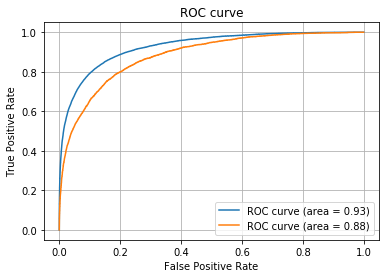

In [215]:
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_train_pred)
auc_train = metrics.auc(fpr_train, tpr_train)

fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
auc_val = metrics.auc(fpr_val, tpr_val)
print('------------------')
print(auc_train)
print(auc_val)

plt.plot(fpr_train, tpr_train, label='ROC curve (area = %.2f)'%auc_train)
plt.plot(fpr_val, tpr_val, label='ROC curve (area = %.2f)'%auc_val)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

plt.show

In [216]:
gbms = []
num_gbm  = 5

for i in range(num_gbm):
    print(i)
    X_cv_train, X_cv_val, y_cv_train, y_cv_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=i, stratify=y_train)

    lgb_cv_train = lgb.Dataset(X_cv_train, y_cv_train)
    lgb_cv_val = lgb.Dataset(X_cv_val, y_cv_val, reference=lgb_cv_train)

    params = {
        'objective': 'binary',
        'boost_from_average':False,
        'metric': 'auc',
        'boosting_type': 'gbdt', 
    'feature_fraction': 0.9077963052915876, 'learning_rate': 0.011358781846579069, 'subsample': 0.8453858498917617, 'min_data_in_leaf': 87, 'min_sum_hessian_in_leaf': 0.0021980270412619816, 'bagging_fraction': 0.8726993481456968, 'bagging_freq': 10, 'min_gain_to_split': 0.8438313225454216, 'lambda_l1': 0.4047026283855469, 'lambda_l2': 0.08369497932482868, 'num_leaves': 18, 'max_bin': 164
    }

    gbm = lgb.train(params,
                    lgb_cv_train,
                    valid_sets=lgb_cv_val,
                    num_boost_round=20000,
                    early_stopping_rounds=100,
                    verbose_eval = 0)
    gbms.append(gbm)

0
1
2
3
4


0.8940962779211226
0.8931752576749383
0.8930252019502265
0.8936544279713162
0.8940168598364489
0.8956041015047055


<function matplotlib.pyplot.show(*args, **kw)>

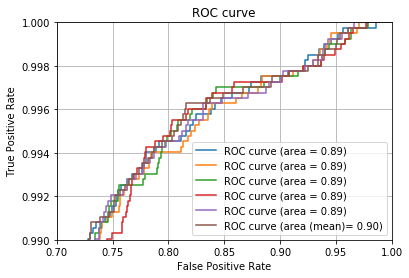

In [230]:
y_pred_list_gbm = []
for gbm in gbms:

    y_val_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
    y_pred_list_gbm.append(y_val_pred)

    fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_val_pred)
    auc_val = metrics.auc(fpr_val, tpr_val)

    plt.plot(fpr_val, tpr_val, label='ROC curve (area = %.2f)'%auc_val)
    print(auc_val)

y_pred_mean_gbm = np.array(y_pred_list_gbm).prod(axis=0)
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_pred_mean_gbm)
auc_val = metrics.auc(fpr_val, tpr_val)
# print('------------------')
# print(auc_train)
print(auc_val)

# plt.plot(fpr_train, tpr_train, label='ROC curve (area = %.2f)'%auc_train)
plt.plot(fpr_val, tpr_val, label='ROC curve (area (mean)= %.2f)'%auc_val)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.xlim(0.7, 1)
plt.ylim(0.99, 1)
plt.show

0.8956727410750583


<function matplotlib.pyplot.show(*args, **kw)>

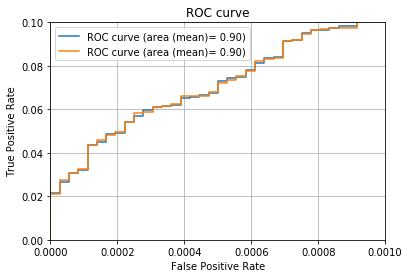

In [228]:
y_pred_mean =( y_pred_mean_gbm * y_pred_mean_gnb) ** 0.5

fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_pred_mean)
auc_val = metrics.auc(fpr_val, tpr_val)
print(auc_val)
plt.plot(fpr_val, tpr_val, label='ROC curve (area (mean)= %.2f)'%auc_val)

y_pred_mean = y_pred_mean_gbm * y_pred_mean_gnb * X_post_val_mean
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_pred_mean)
auc_val = metrics.auc(fpr_val, tpr_val)
plt.plot(fpr_val, tpr_val, label='ROC curve (area (mean)= %.2f)'%auc_val)

plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.xlim(0, 0.001)
plt.ylim(0, 0.1)
plt.show

0.89568681744142


<function matplotlib.pyplot.show(*args, **kw)>

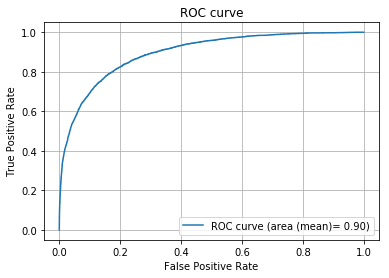

In [224]:
y_pred_mean = y_pred_mean_gbm * y_pred_mean_gnb * X_post_val_mean

fpr_val, tpr_val, thresholds_val = metrics.roc_curve(y_val, y_pred_mean)
auc_val = metrics.auc(fpr_val, tpr_val)
print(auc_val)
plt.plot(fpr_val, tpr_val, label='ROC curve (area (mean)= %.2f)'%auc_val)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show